In [1]:
#importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import cv2
from PIL import Image
from tensorflow.math import confusion_matrix

In [2]:
tf.random.set_seed(3)#purpose of setting the seed is that during training the neural network,several values 
#randomnly generate because of this randomness the each time if we train the neural network it generate differnet results so
#setting the seed doesnot change the accuary


In [3]:
#importing the data

In [4]:
data=tf.keras.datasets.mnist
#mnist=modified national institution of standard and technology
#this dataset is used to train the model to recognize the handwritten digits
#mnist has a dataset of 70,000 and 28x28 image from 0 to 9

In [5]:
#splitting the data into training and testing

In [6]:
(X_train,Y_train),(X_test,Y_test)=data.load_data()

In [7]:
#checking for type of data

In [8]:
type(X_train),type(Y_train),type(X_test),type(Y_test)



(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [9]:
#so images are converted into array

In [10]:
#checking for shape of array

In [11]:
(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [12]:
#means it has 60000 images of dimension 28x28
#images are stored in X_test and Y_test are labels for this image
#grayscale image=1 channel

In [13]:
#printing the images

In [14]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [15]:
#checking for the shape of image
print(X_train[10].shape)

(28, 28)


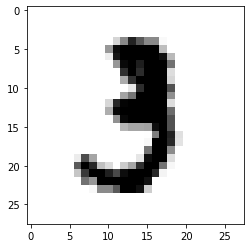

label no: 3


In [16]:
#displaying the image
plt.imshow(X_train[10],cmap=plt.cm.binary)
plt.show()
#printing the label for this image
print('label no:',Y_train[10])

In [17]:
#printing the label shape for X_test and Y_test
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [18]:
#checking for unique value in y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [19]:
#digit labels are from 0-9

In [20]:
#EDA

In [21]:
#data scaling

In [22]:
#normalization

In [23]:
x_train=tf.keras.utils.normalize(X_train)
x_test=tf.keras.utils.normalize(X_test)

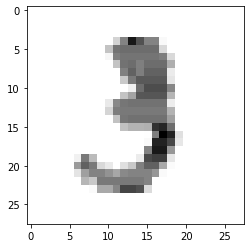

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [24]:
#displaying the image and printing the image data points
plt.imshow(x_train[10],cmap=plt.cm.binary)
plt.show()

print(x_train[10])

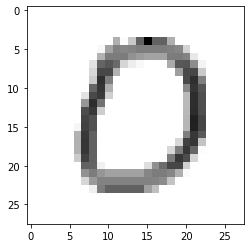

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
plt.imshow(x_test[10],cmap=plt.cm.binary)
plt.show()
print(x_test[10])

In [26]:
#building the neural network

In [27]:
model=tf.keras.models.Sequential()

In [28]:
#flatten the data

In [29]:
model.add(tf.keras.layers.Flatten())

In [30]:
#adding first layers to neural network 

In [31]:
model.add(tf.keras.layers.Dense(units=100,activation='sigmoid'))

In [32]:
#adding second layer to the neural network

In [33]:
model.add(tf.keras.layers.Dense(units=60,activation='sigmoid'))

In [34]:
#adding third layer to the neural network`

In [35]:
model.add(tf.keras.layers.Dense(units=30,activation='tanh'))

In [36]:
#adding output layer to my neural network

In [37]:
model.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))

In [38]:
#compiling my neural network

In [39]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
#training the model

In [41]:
trained_model=model.fit(x_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5548 - accuracy: 0.8436
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2284 - accuracy: 0.9310
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1679 - accuracy: 0.9494
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1317 - accuracy: 0.9614
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1073 - accuracy: 0.9674
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0903 - accuracy: 0.9729
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0776 - accuracy: 0.9766
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0676 - accuracy: 0.9796
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0590 - accuracy: 0.9818
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss:

In [42]:
loss, accuracy=model.evaluate(x_test,Y_test)
print('loss:',loss)
print('accuracy:',accuracy)

313/313 [==============================] - 2s 4ms/step - loss: 0.0943 - accuracy: 0.9715
loss: 0.09428860992193222
accuracy: 0.9714999794960022


In [43]:
#test data accuracy=97.3%

In [44]:
#print the shape of x_test
print(x_test.shape)

(10000, 28, 28)


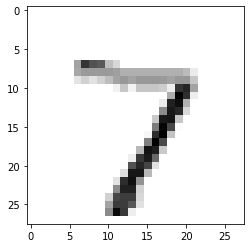

In [45]:
#displaying the first number in the x_test
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [46]:
#comparing x_test value with y_test label value
print(Y_test[0])

7


In [47]:
#making a prediction system

In [48]:
y_predict=model.predict([x_test])
print(y_predict)
print(y_predict.shape)

313/313 [==============================] - 1s 3ms/step
[[0.33350712 0.3893675  0.8053092  ... 0.99999785 0.01345965 0.76400983]
 [0.54240954 0.9711014  0.9999888  ... 0.11969068 0.6647804  0.00117349]
 [0.01078538 0.9999869  0.1469259  ... 0.890175   0.67875004 0.24801685]
 ...
 [0.00486756 0.0087455  0.04465332 ... 0.87623745 0.42833915 0.951524  ]
 [0.07055444 0.12953451 0.00238255 ... 0.02806718 0.99667096 0.27071917]
 [0.44010326 0.32016    0.39461178 ... 0.06235657 0.7249958  0.17642869]]
(10000, 10)


In [49]:
#in machine learning :predict gives the label values
#in deep learning :predict gives the probabilty of the values

In [50]:
#checking y_preidct for first index value

In [51]:
y_predict[0]

array([0.33350712, 0.3893675 , 0.8053092 , 0.5261099 , 0.02835744,
       0.03822226, 0.01091836, 0.99999785, 0.01345965, 0.76400983],
      dtype=float32)

In [52]:
#each value in the y_predict[0] represents the probabilty of the number from 0 to 9(each class)

In [53]:
#converting y_predict probability into digit for first index 

In [54]:
digit_of_y_predict=np.argmax(y_predict[0])
print(digit_of_y_predict)

7


In [55]:
# the above digit in the index of y_predict[0] has maximum probability

In [56]:
#converting y_predict probabilities into label for all data points of test

In [57]:
all_digits_of_y_predict=[np.argmax(i) for i in y_predict]
print(all_digits_of_y_predict)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 3, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [58]:


#comparing the digits of y_predicted, y_test, x_test

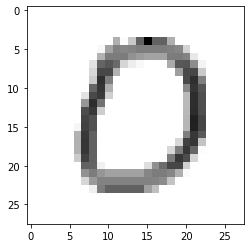

In [59]:
plt.imshow(x_test[10],cmap=plt.cm.binary)
plt.show()


In [60]:
print(Y_test[10])

0


In [61]:
print(np.argmax(y_predict[10]))

0


In [62]:
#so all the testing and predict system are giving same values

Y_test--->true labels

all_digits_of_y_predict--->predicted test data labels

In [63]:
#printing confusion matrix

In [64]:
cf_matrix=confusion_matrix(Y_test,all_digits_of_y_predict)
print(cf_matrix)

tf.Tensor(
[[ 959    0    3    2    0    7    5    1    2    1]
 [   0 1126    4    0    0    1    1    1    2    0]
 [   4    0 1008    5    0    1    1    6    6    1]
 [   0    0    4  978    0   15    0    7    4    2]
 [   1    0    3    0  946    1    6    2    3   20]
 [   2    0    0    4    1  881    3    0    0    1]
 [   2    3    1    0    4    8  934    0    6    0]
 [   0    7    7    2    1    1    0  998    0   12]
 [   2    1    5   11    5   21    2    4  916    7]
 [   0    4    1    6    9   10    1    8    1  969]], shape=(10, 10), dtype=int32)


Text(78.0, 0.5, 'actual labels')

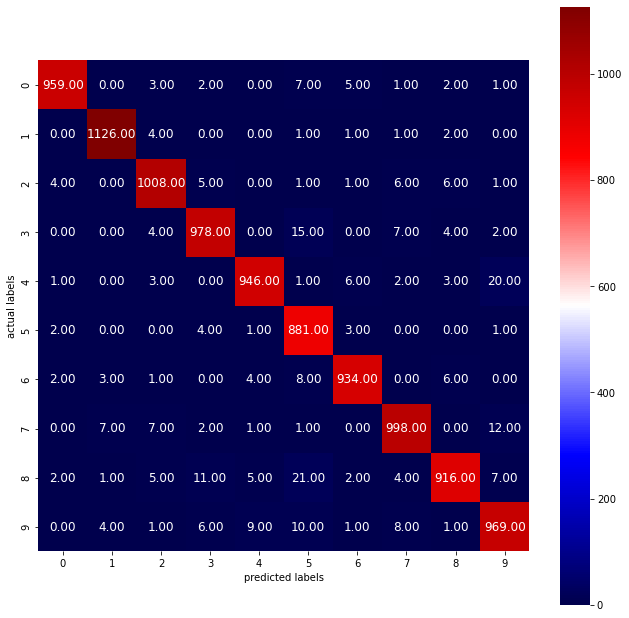

In [65]:
plt.figure(figsize=(11,11))
confusion_matrix=sns.heatmap(cf_matrix,cbar=True,square=True,
                             annot=True,annot_kws={'size':12},fmt='0.2f',cmap='seismic')
plt.xlabel('predicted labels')
plt.ylabel('actual labels')

In [66]:
#building a prediction system

In [67]:
#converting into numpy array

In [68]:
input_path='C:\\Users\\pavan\\Desktop\\data science course\\deeplearning\\deep learning projects\\ANN project\\ANN project 1'

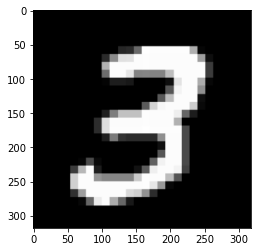

In [69]:
input_data=['testing image']
for data in input_data:
    path=os.path.join(input_path, data)#gives path to image
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()

In [70]:
img_array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [71]:
#printing the shape of the img_array

In [72]:
img_array.shape

(318, 318, 3)

In [73]:
#converting this image into grayscale image and resize the image

In [74]:
grayscale=cv2.cvtColor(img_array,cv2.COLOR_RGB2GRAY)

In [75]:
grayscale.shape

(318, 318)

In [76]:
#reshaping the image

In [77]:
resized_image=cv2.resize(grayscale,(28,28))
print(resized_image.shape)

(28, 28)


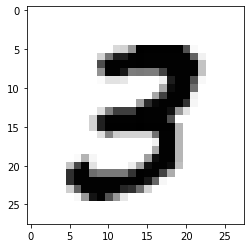

In [79]:
plt.imshow(resized_image,cmap=plt.cm.binary)

In [80]:
#normalizing the image size

In [81]:
resized_image=tf.keras.utils.normalize(resized_image)
print(resized_image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [82]:
#reshaping the array into numpy

In [83]:
image_reshaped=np.reshape(resized_image,[1,28,28])#1:dealing with one image


In [84]:
input_prediction=model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 223ms/step
[[3.15322238e-03 5.61404347e-01 8.55149686e-01 9.99996483e-01
  2.84839375e-03 4.08107549e-01 1.34782695e-05 2.61877000e-01
  9.07714963e-01 9.36068475e-01]]


In [85]:
#getting the maximum probanility
np.argmax(input_prediction)

3

In [86]:
#so the input_prediction is giving the same value as imported image